In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qog_std_cs_jan18.csv')

#### 1. Genere una muestra de casos

In [88]:
#Ultimos digitos del rut como semilla pseudoaleatoria
seed = np.random.seed(6992)

#Seleccionar 50% de los casos e incluir las columnas definidas
columnas = ['undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop']
columnas_apellido = ['ffp_hf','wef_qes','wdi_expedu','wdi_ners']
columnas = columnas + columnas_apellido

df2 = df[columnas].sample(frac=0.5,random_state=seed)

df2


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
9,0.892,AUT,5,38868.0390,8.544000,1.5,4.492075,5.49955,NaN
117,0.795,OMN,3,26158.7300,3.717000,1.9,3.535049,4.96038,94.329842
89,NaN,PRK,6,1727.8199,NaN,4.2,NaN,NaN,76.203728
106,0.438,MLI,4,1063.2600,14.854000,8.4,3.003276,3.73929,34.616100
27,0.798,BLR,1,17780.6410,9.468000,3.4,NaN,4.99044,99.465446
...,...,...,...,...,...,...,...,...,...
167,0.909,SWE,5,39000.9100,9.645000,1.5,4.577006,7.67509,96.651558
133,0.515,PNG,9,1693.5400,6.880000,7.1,NaN,NaN,NaN
118,0.637,NAM,4,4521.2900,NaN,6.5,3.052896,NaN,NaN
148,NaN,SMR,5,42664.2110,0.034000,NaN,NaN,2.38373,NaN


##### 2. Genere una funcion que ingrese su objeto y devuelva lo siguiente

In [89]:
def variables_continuas(df):
    #Calcula medidas descriptivas para los casos continuos
    des_continua = df.describe()
    #Calcula frecuencia para cada variable discreta
    frec_ht_region = df['ht_region'].value_counts()
    
    describe = des_continua[['gle_cgdpc','undp_hdi','imf_pop']]
    
    return describe

variables_continuas(df2)

,gle_cgdpc,undp_hdi,imf_pop
count,96.000000,93.000000,69.000000
mean,13011.244588,0.690753,24.853174
std,15889.896093,0.148394,47.459894
min,324.160000,0.347000,0.018000
25%,2487.785100,0.576000,2.045000
50%,7787.039800,0.723000,6.929000
75%,16882.912750,0.798000,23.434000
max,104049.440000,0.948000,252.164993


##### 3. Genere una funcion que liste las observaciones perdidas de una variable

In [90]:
def funcion(df, var, print_list=False):
    df_na = df.isna()
    n = len(df[var])
    n_perdidos = len(df_na[df_na[var] == True])
    porcentaje = round((n_perdidos*100)/n,2)
    
    df_fil = df[df_na[var] == True]
    
    if print_list == False:
        return n_perdidos,porcentaje
    else:
        return n_perdidos, porcentaje, df_fil


In [91]:
#Se analizan variables
df_result = pd.DataFrame(columns=['nombre','perdidos','porcentaje'])

for col in df2.columns:
    res = funcion(df2,col)
    df_result = df_result.append({'nombre': col,'perdidos': res[0],'porcentaje': res[1]}, ignore_index = True)
    
df_result.sort_values(by=['porcentaje'], ascending=False).head(3)
    

/var/folders/q4/qtrpx3ns2zsf7ycph__16lz80000gn/T/ipykernel_6014/1910422455.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'nombre': col,'perdidos': res[0],'porcentaje': res[1]}, ignore_index = True)
/var/folders/q4/qtrpx3ns2zsf7ycph__16lz80000gn/T/ipykernel_6014/1910422455.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'nombre': col,'perdidos': res[0],'porcentaje': res[1]}, ignore_index = True)
/var/folders/q4/qtrpx3ns2zsf7ycph__16lz80000gn/T/ipykernel_6014/1910422455.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'nombre': col,'perdidos': res[0],'porcentaje': res[1]}, ignore_index = True)
/var/folders/q4/qtrpx3ns2zsf7yc

,nombre,perdidos,porcentaje
8,wdi_ners,34,35.05
4,imf_pop,28,28.87
7,wdi_expedu,25,25.77


In [92]:
#Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de paises con ausencia de datos

df2_na = df2.isna()

#Variable wdi_ners
df2_fil_wdi_ners = df2[df2_na['wdi_ners'] == True]
df2_fil_wdi_ners['ccodealp']
#Variable wdi_ners
df2_fil_imf_pop = df2[df2_na['imf_pop'] == True]
df2_fil_imf_pop['ccodealp']
#Variable wdi_expedu
df2_fil_wdi_expedu = df2[df2_na['wdi_expedu'] == True]
df2_fil_wdi_expedu['ccodealp']

89     PRK
79     IRQ
72     HTI
25     MMR
124    NIC
159    SOM
66     KIR
50     DOM
193    ZMB
68     GRD
37     TWN
49     DMA
95     LSO
19     BWA
130    PLW
165    SUR
40     COG
164    SDN
190    VEN
175    ARE
98     LBY
150    SAU
36     CHN
133    PNG
118    NAM
Name: ccodealp, dtype: object

##### 4. Grafique histogramas indicando medias muestral y total

In [151]:
def graf_histograma(sample_df, full_df, var, sample_mean=False, true_mean=False):
    
    plt.figure(figsize=(4,6))
    #Grafico Sample
    plt.subplot(2,1,1)
    plt.hist(sample_df[var], color='grey', alpha=.4)
    if sample_mean:
        plt.axvline(sample_df[var].mean(),color='dodgerblue', linestyle='--', lw=2)
    plt.title(f'Histograma de la media variable {var} datos de la muestra')
    
    #Grafico Full
    plt.subplot(2,1,2)
    plt.hist(full_df[var], color='grey', alpha=.4)
    if true_mean:
        plt.axvline(full_df[var].mean(),color='dodgerblue', linestyle='--', lw=2)
    plt.title(f'Histograma de la media variable {var} datos Full')
    plt.tight_layout()
    
    return round(sample_df[var].mean(),3),round(full_df[var].mean(),3)

(5.676, 5.535)

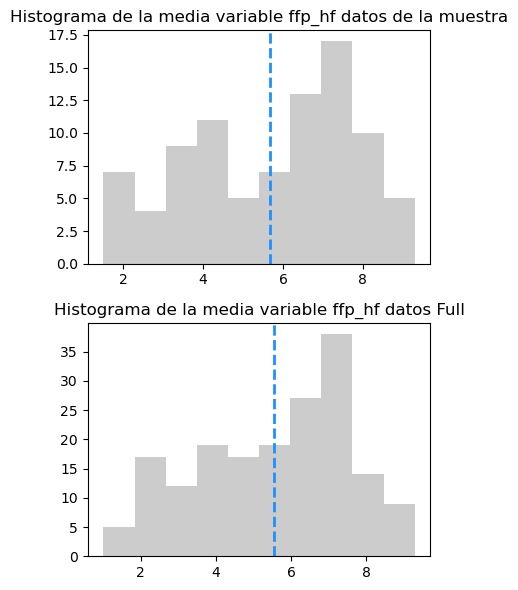

In [152]:
graf_histograma(df2,df,'ffp_hf',True,True)

(3.734, 3.694)

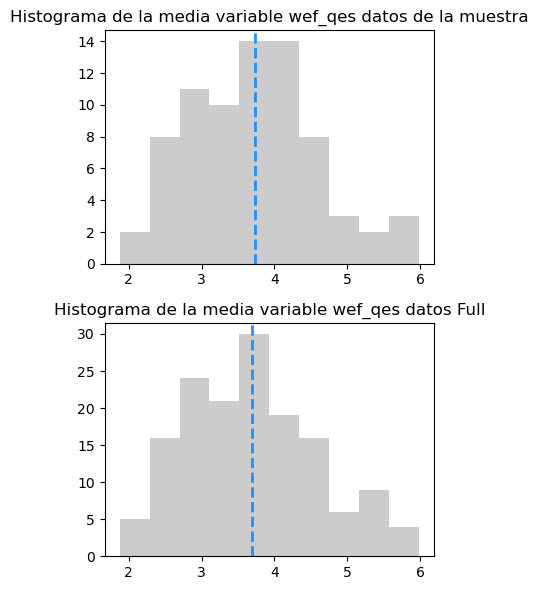

In [153]:
graf_histograma(df2,df,'wef_qes',True,True)

(4.655, 4.58)

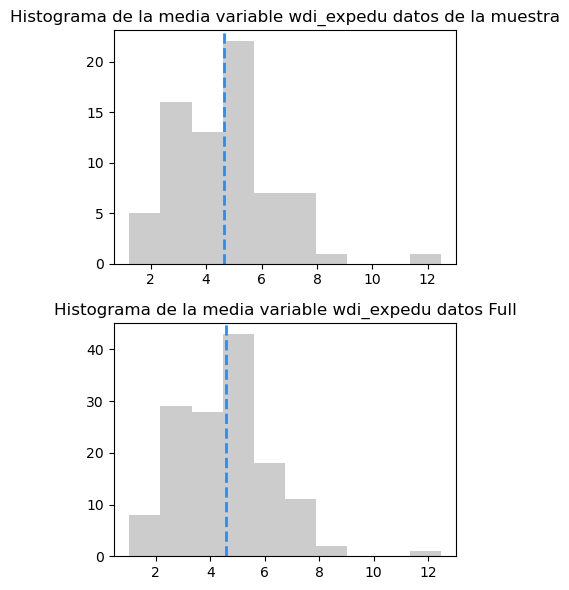

In [154]:
graf_histograma(df2,df,'wdi_expedu',True,True)

(72.167, 72.723)

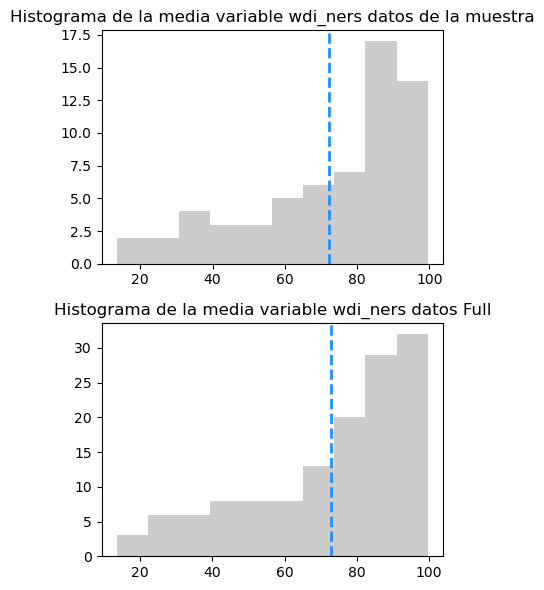

In [155]:
graf_histograma(df2,df,'wdi_ners',True,True)

Las variables donde la media de la muestra es mayor a la de los datos completos son:
- ffp_hf
- wef_qes
- wdi_expedu

##### 5. Genere una funcion que devuelva un dotplot con las medias por region para una variable entregada

In [174]:
#Se buscan 5 ya que ht_region se considera como variable discreta ya que es el codigo de la region
#y ccodealp corresponde a un codigo del pais
df_result.sort_values(by=['porcentaje'], ascending=True).head(5)

,nombre,perdidos,porcentaje
1,ccodealp,0,0.00
2,ht_region,0,0.00
3,gle_cgdpc,1,1.03
0,undp_hdi,4,4.12
5,ffp_hf,9,9.28


In [196]:
def graf_dotplot(dataframe, plot_var, plot_by, statistic='mean', global_stat=False):
    if statistic == 'median':
        group = round(dataframe.groupby(plot_by)[plot_var].median(),2)
        plt.axvline(dataframe[plot_var].median(), color = 'tomato', linestyle = '--')
    else:
        group = round(dataframe.groupby(plot_by)[plot_var].mean(),2)
        plt.axvline(dataframe[plot_var].mean(), color = 'tomato', linestyle = '--')
    
    plt.title(plot_var)
    if not global_stat:
        plt.plot(group.values, group.index, 'o', color = 'grey')
    else:
        plt.plot(dataframe[plot_var], dataframe[plot_var].index, 'o', color = 'grey')
    
    return True

True

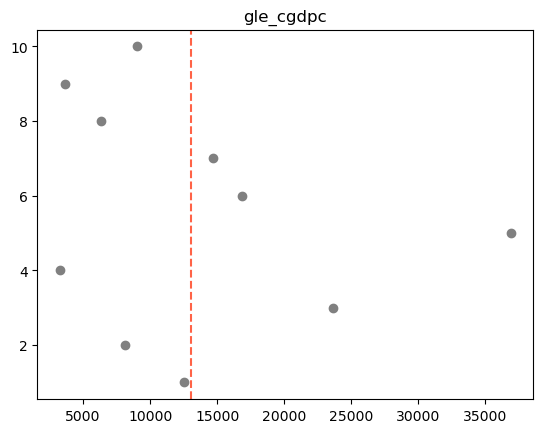

In [197]:
#gle_cgdpc (1.03%)
graf_dotplot(df2,'gle_cgdpc','ht_region','mean',False)

True

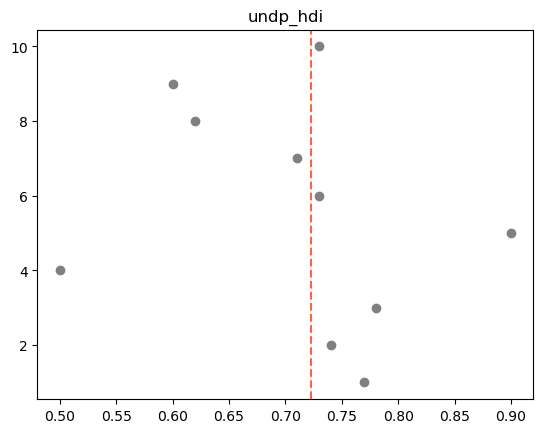

In [198]:
#undp_hdi (4,12%)
graf_dotplot(df2,'undp_hdi','ht_region','median',False)

True

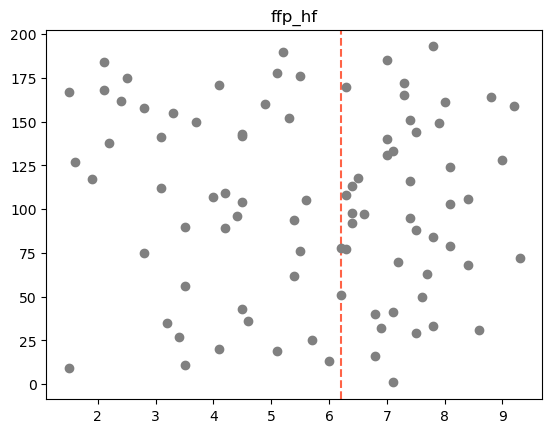

In [199]:
#ffp_hf (9.28%)
graf_dotplot(df2,'ffp_hf','ht_region','median',True)

##### 6. Guardar la base de datos

In [200]:
df2.to_csv('subsample_sm_demo.csv')